In [4]:
# steps to download datasetv directly from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:07<00:00, 273MB/s]
100% 1.06G/1.06G [00:07<00:00, 157MB/s]


In [6]:
# unzip file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [8]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# noramlization(we will covert data into 0 and 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model
model = Sequential()

# 1st convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# 2nd convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# 3rd convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# faltten output
model.add(Flatten())

#1st dense layer
model.add(Dense(128,activation="relu"))

#2nd dense layer
model.add(Dense(64,activation="relu"))

#3rd dense layer
model.add(Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 81ms/step - loss: 0.6309 - accuracy: 0.6545 - val_loss: 0.5174 - val_accuracy: 0.7510
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4857 - accuracy: 0.7655 - val_loss: 0.4686 - val_accuracy: 0.7842
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3667 - accuracy: 0.8373 - val_loss: 0.4935 - val_accuracy: 0.7782
Epoch 4/10
625/625 [==============================] - 74s 117ms/step - loss: 0.2243 - accuracy: 0.9065 - val_loss: 0.5629 - val_accuracy: 0.7904
Epoch 5/10
625/625 [==============================] - 62s 98ms/step - loss: 0.1214 - accuracy: 0.9545 - val_loss: 0.8589 - val_accuracy: 0.7778
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0806 - accuracy: 0.9711 - val_loss: 0.9437 - val_accuracy: 0.7862
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 1.0969 - val_accuracy

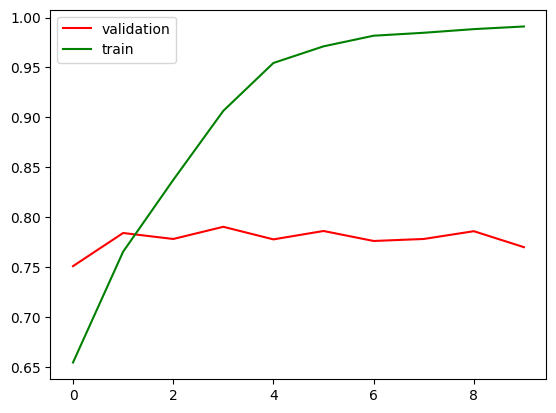

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"],color="red",label="validation")
plt.plot(history.history["accuracy"],color="green",label="train")

plt.legend()
plt.show()